# Residual Maps 

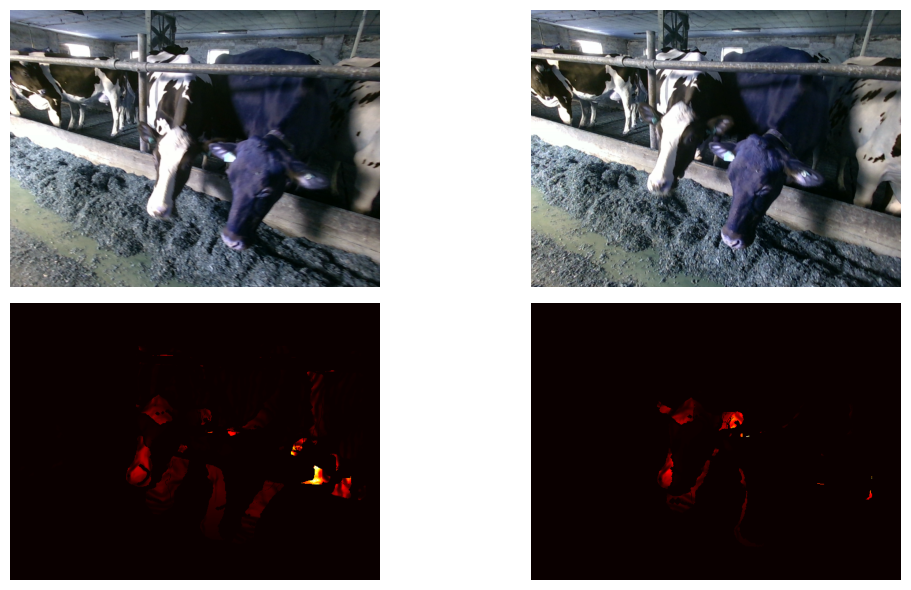

In [3]:
import open3d as o3d
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def plot_residual_map(method):

    source = Image.open("presentation_data/sample_sensor_data/color/source.png")
    source = np.array(source)

    target = Image.open("presentation_data/sample_sensor_data/color/target.png")
    target = np.array(target)

    rm_p2p_pre =  np.load("presentation_data/r_map_data/p2p_pre.npy")
    rm_p2p_after = np.load("presentation_data/r_map_data/p2p_after.npy")

    rm_hybrid_pre = np.load("presentation_data/r_map_data/hybrid_pre.npy")
    rm_hybrid_after = np.load("presentation_data/r_map_data/hybrid_after.npy")

    rm_intesity_pre = np.load("presentation_data/r_map_data/intensity_pre.npy")
    rm_intesity_after = np.load("presentation_data/r_map_data/intensity_after.npy")

    if method == "p2p":
        rm_pre = rm_p2p_pre
        rm_after = rm_p2p_after
    elif method == "hybrid":
        rm_pre = rm_hybrid_pre
        rm_after = rm_hybrid_after
    elif method == "intensity":
        rm_pre = rm_intesity_pre
        rm_after = rm_intesity_after
    else:
        raise ValueError("Unknown method: {}".format(method))

    fig, ax = plt.subplots(2, 2, figsize=(12, 6))
    ax[0][0].imshow(source)
    ax[0][0].axis('off')

    ax[0][1].imshow(target)
    ax[0][1].axis('off')

    ax[1][0].imshow(rm_pre, cmap='hot')
    ax[1][0].axis('off')

    ax[1][1].imshow(rm_after, cmap='hot')
    ax[1][1].axis('off')

    plt.tight_layout()
    plt.show()

plot_residual_map("p2p") 
